In [5]:
!pip install tensorflow

In [3]:
!pip install tensorflowjs

In [4]:
!pip install tensorflow-io 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_22.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_53.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_69.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Picsart_23-06-05_23-32-10-167.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_68.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Picsart_23-06-05_23-32-10-167(1).jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Picsart_23-06-05_23-31-05-015(1).jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Picsart_23-06-08_12-50-56-631.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_51.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_88.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_4.jpg
/kaggle/input/soilitaugmentedversion/soil_training/aluvial/Image_75.jpg
/kaggle/input/soilitaugmentedversion/soil_train

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
IMAGE_SIZE = [224, 224]
train_data_path = "/kaggle/input/soilitaugmentedversion/soil_training"
test_data_path = "/kaggle/input/soilitaugmentedversion/soil_test"

In [10]:
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [12]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [13]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [17]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/soilitaugmentedversion/soil_training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1113 images belonging to 11 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/kaggle/input/soilitaugmentedversion/soil_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                           shuffle=False)

Found 1113 images belonging to 11 classes.


In [20]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(training_set.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=20,
    validation_data=test_set
)

Epoch 1/20
 1/35 [..............................] - ETA: 6:38 - loss: 3.1521 - accuracy: 0.0625

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


35/35 [==============================] - 48s 1s/step - loss: 2.1821 - accuracy: 0.2767 - val_loss: 1.6218 - val_accuracy: 0.4897
Epoch 2/20
35/35 [==============================] - 29s 828ms/step - loss: 1.4768 - accuracy: 0.5310 - val_loss: 1.2384 - val_accuracy: 0.6208
Epoch 3/20
35/35 [==============================] - 28s 806ms/step - loss: 1.2628 - accuracy: 0.5984 - val_loss: 1.0933 - val_accuracy: 0.6568
Epoch 4/20
35/35 [==============================] - 29s 829ms/step - loss: 1.0845 - accuracy: 0.6541 - val_loss: 0.9575 - val_accuracy: 0.6999
Epoch 5/20
35/35 [==============================] - 29s 819ms/step - loss: 0.9929 - accuracy: 0.6972 - val_loss: 0.8811 - val_accuracy: 0.7287
Epoch 6/20
35/35 [==============================] - 29s 828ms/step - loss: 0.8675 - accuracy: 0.7358 - val_loss: 0.8213 - val_accuracy: 0.7385
Epoch 7/20
35/35 [==============================] - 28s 816ms/step - loss: 0.8100 - accuracy: 0.7367 - val_loss: 0.7364 - val_accuracy: 0.7754
Epoch 8/20
35

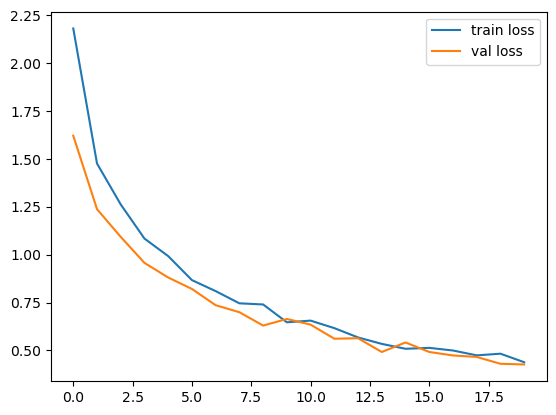

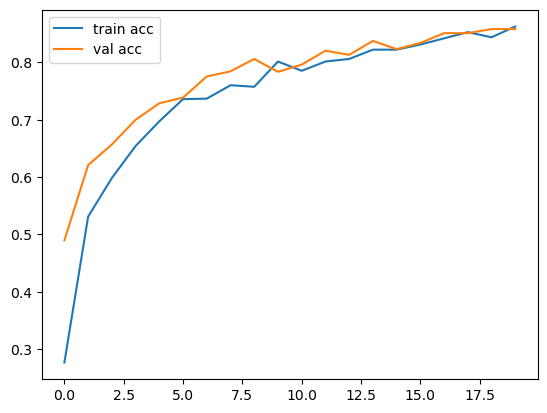

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import save_model

# Save the model as an h5 file
save_model(model, 'model_mobilenetv2.h5')

In [32]:
num_samples = test_set.n
num_classes = test_set.num_classes
y_pred = model.predict(test_set, steps=(num_samples // 32+1))

35/35 [==============================] - 9s 261ms/step


In [33]:
y_pred

array([[7.3823017e-01, 2.1631582e-02, 9.2180828e-03, ..., 1.0665598e-03,
        2.4408454e-02, 1.3076259e-02],
       [6.0571688e-01, 3.9231516e-03, 9.6498657e-04, ..., 2.0196667e-04,
        5.3559266e-02, 7.5528113e-04],
       [1.9187951e-01, 3.0664078e-04, 2.0376677e-04, ..., 7.5962530e-03,
        8.9942487e-03, 6.0010358e-04],
       ...,
       [1.9368368e-01, 9.8496996e-05, 4.5316853e-03, ..., 9.9807911e-02,
        7.6012306e-02, 4.0131089e-01],
       [5.5943725e-05, 1.7108636e-05, 7.5600451e-07, ..., 5.1841489e-03,
        5.0993385e-05, 9.8420370e-01],
       [8.6107161e-03, 1.8263765e-04, 8.7985223e-05, ..., 2.1094507e-02,
        1.6630538e-02, 7.3181313e-01]], dtype=float32)

In [29]:
print(num_samples // 32+1)

35


In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([ 0,  0,  4, ..., 10, 10, 10])

In [36]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

In [37]:
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 95   0   0   0  11   2   3   5   2   0   2]
 [  0  92   0   0   0   0   1   4   1   1   3]
 [  3   1 103   0   0   1   1   0   0   0   3]
 [  0   0   0 102   0   0   0   0   2   1   0]
 [  1   0   0   0  89   0   3   0   0   0   3]
 [  2   0   0   0   1  79   5   0   5   0   3]
 [  1   1   0   1   9   2  82   3   0   2   2]
 [  2   7   1   2   1   0   0  70   1   1   2]
 [  0   0   0   0   1   1   2   2 101   0   3]
 [  5   1   2   1   1   1   8  12   1  55   3]
 [  0   0   0   1   0   0   1   2   1   1  87]]


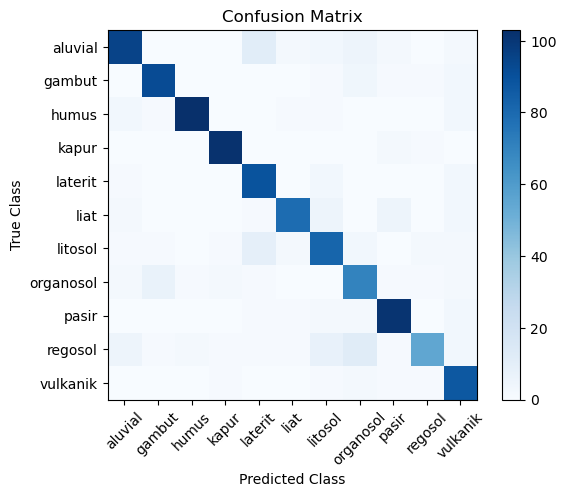

In [38]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, test_set.class_indices, rotation=45)
plt.yticks(tick_marks, test_set.class_indices)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

model = load_model('model_mobilenetv2.h5')
img_data = image.load_img('/content/drive/MyDrive/jenis-tanah-grumusol.webp', target_size=(224, 224))
img_array = image.img_to_array(img_data)
preprocessed_img = preprocess_input(img_array)
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

# Make predictions using the MobileNetV2 model
predictions = model.predict(preprocessed_img)

In [ ]:
import numpy as np

# Assuming you have already loaded and preprocessed the image and made predictions
predictions = model.predict(preprocessed_img)
predicted_class_index = np.argmax(predictions)
class_labels = ['aluvial', 'gambut ', 'humus', 'laterit', 'litosol', 'kapur', 'liat', 'organosol', 'pasir', 'regosol', ]  # Replace with your own class labels

predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

print("Predicted class:", predicted_class_label)
print("Probability:", predicted_probability)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Assuming you have already trained your model and have access to the class labels

# Define your class labels
class_labels = ['Tanah Aluvial', 'Tanah Gambut ', 'Tanah Humus', 'Tanah Laterit', 'Tanah Litosol', 'Tanah Kapur', 'Tanah Liat', 'Tanah Organosol', 'Tanah Pasir', 'Tanah Regosol', 'Tanah Vulkanik']  # Replace with your own class labels

# Save the class labels to the labels.txt file
with open('labels.txt', 'w') as f:
    for label in class_labels:
        f.write(label + '\n')